# Calculate the overturning length scale of the mooring using temperature sorting

In [2]:
import mycurrents.oceanmooring as om

import xray
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.dates as mdates
import pandas as pd


In [178]:
ncfile = '/home/suntans/Share/ARCHub/DATA/FIELD/browse-basin-kissme/Data/NetCDF/KISSME_Gridded_Mooring_TP_60sec_linear.nc'

site = 'NP250'

ncgroup = site

if site=='WP250':
    modes = range(4) # WP250
else:
    modes = range(4)

varname = 'temperature'

#t0 = datetime(2017,4,3,4,0,0) # Waves of depression
#t0 = datetime(2017,4,4,0,0,0)
#t0 = datetime(2017,4,11,8,0,0)
#t0 = datetime(2017,4,27,8,0,0) # Waves of elevation
#t0 = datetime(2017,5,6,8,0,0) # Large Mode-2

# Load some data
T = om.from_netcdf(ncfile, varname, group=ncgroup)

T


OceanMooring(Nz=22, Nt=56069)
	variable: temperature [degC]

In [179]:
# Sort the temperature data
kidx = np.argsort(T.y, axis=0)

tidx = np.repeat(np.arange(T.Nt)[np.newaxis,:], T.Nz, axis=0)

Zsort = T.zvar[kidx, tidx]

L_T = np.abs(Zsort - T.zvar)

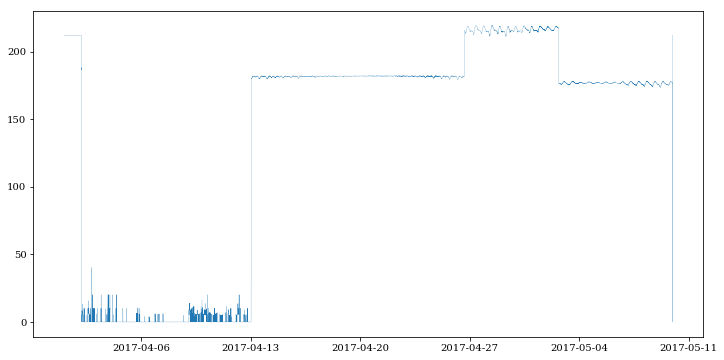

In [180]:
plt.figure(figsize=(12,6))
plt.plot(T.t, L_T.max(axis=0), lw=0.2)
plt.show()

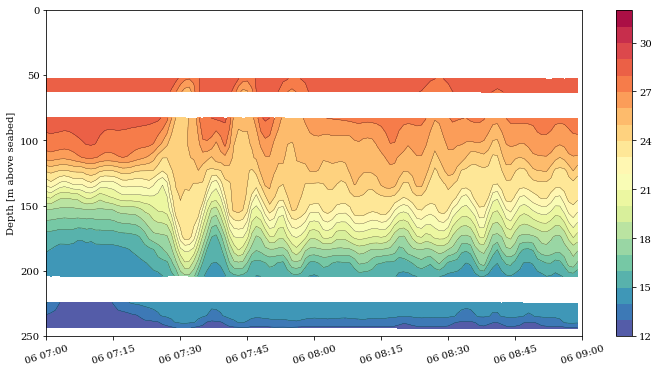

In [207]:
Ts = T.clip(datetime(2017,5,6,7,0,0), datetime(2017,5,6,9,0,0))

#Ts = T.clip(datetime(2017,4,3,2,0,0), datetime(2017,4,3,12,0,0))
#Ts = T.clip(datetime(2017,4,30,8,0,0), datetime(2017,4,30,13,0,0))



plt.figure(figsize=(12,6))
Ts.contourf(np.arange(12,33,1))
Ts.contourf(np.arange(12,33,1), filled=False, cbar=False)
plt.show()

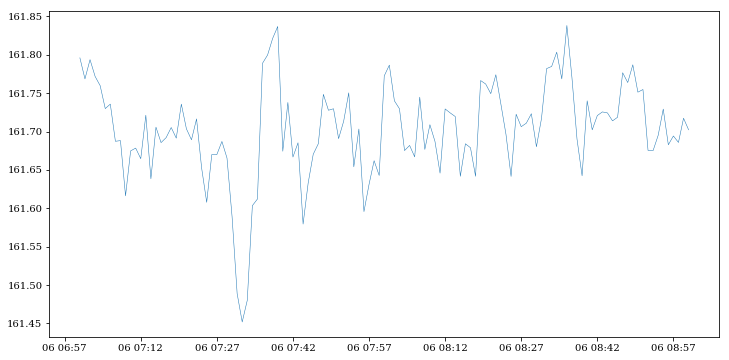

In [208]:
# Sort the temperature data
kidx = np.argsort(Ts.y, axis=0)

tidx = np.repeat(np.arange(Ts.Nt)[np.newaxis,:], Ts.Nz, axis=0)

Zsort = Ts.zvar[kidx, tidx]
Zsort[Ts.y.mask] = np.nan
L_T = np.abs(Zsort - Ts.zvar)
L_T[Ts.y.mask] = np.nan
 
plt.figure(figsize=(12,6))
plt.plot(Ts.t, np.nanmax(L_T,axis=0), lw=0.5)
plt.show()

In [209]:
Ts.y[:,0]

masked_array(data = [-- 12.599906666666667 12.67145 12.925468333333335 14.08294 --
 14.667221666666666 14.714316666666665 15.067639999999999
 15.612020000000001 17.88290166666667 20.111919999999998 22.372329166666667
 24.184419166666665 26.466725833333335 27.548525833333333
 28.559464166666665 -- 28.593854166666667 28.56445 -- --],
             mask = [ True False False False False  True False False False False False False
 False False False False False  True False False  True  True],
       fill_value = 1e+20)

In [210]:
kidx[:,0]

array([ 1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 19, 18,
        0, 20,  5, 17, 21])

In [211]:
np.argsort(Ts.y[:,0], kind='mergesort')

array([ 1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 19, 18,
        0,  5, 17, 20, 21])

In [212]:
nans = np.isnan(Ts.y[:,0])
Tnonan = Ts.y[~nans,0]
Tnonan

masked_array(data = [12.599906666666667 12.67145 12.925468333333335 14.08294 14.667221666666666
 14.714316666666665 15.067639999999999 15.612020000000001 17.88290166666667
 20.111919999999998 22.372329166666667 24.184419166666665
 26.466725833333335 27.548525833333333 28.559464166666665
 28.593854166666667 28.56445],
             mask = [False False False False False False False False False False False False
 False False False False False],
       fill_value = 1e+20)

In [213]:
kidx = np.argsort(Tnonan.data, kind='heapsort')
Ts.zvar[kidx,0], Tnonan[kidx], kidx

(array([ 250.00306948,  243.66797956,  239.36425   ,  234.31191233,
         224.20723698,  214.10256164,  203.99788629,  193.89321094,
         183.7885356 ,  173.68386025,  153.35325346,  143.24857811,
         133.14390277,  123.03922742,  112.93455207,   82.62052604,
         102.82987673]),
 masked_array(data = [12.599906666666667 12.67145 12.925468333333335 14.08294 14.667221666666666
  14.714316666666665 15.067639999999999 15.612020000000001 17.88290166666667
  20.111919999999998 22.372329166666667 24.184419166666665
  26.466725833333335 27.548525833333333 28.559464166666665 28.56445
  28.593854166666667],
              mask = [False False False False False False False False False False False False
  False False False False False],
        fill_value = 1e+20),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 15]))

In [214]:
L_T = np.zeros((Ts.Nz, Ts.Nt))
Tpr = np.zeros((Ts.Nz, Ts.Nt))
for ii in range(Ts.Nt):
    idx = ~Ts.y[:,ii].mask

    y = Ts.y[idx,ii]
    z = Ts.zvar[idx,ii]
    
    kidx = np.argsort(y)
    L_T[idx,ii] = np.abs(z - z[kidx])
    Tpr[idx,ii] = np.abs(y - y[kidx])

    #L_T[ii] = np.max(L)
    

In [215]:
L = om.OceanMooring(Ts.t, L_T, Ts.Z, zvar = Ts.zvar)
Tpr = om.OceanMooring(Ts.t, Tpr, Ts.Z, zvar = Ts.zvar)

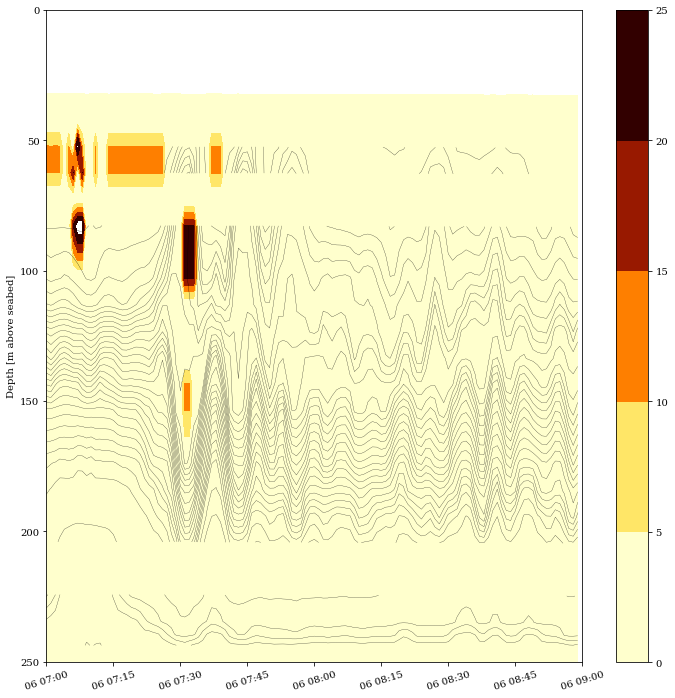

In [225]:
plt.figure(figsize=(12,12))
L.contourf(np.arange(0,30,5.), cmap='afmhot_r')
#Tpr.contourf(np.arange(0,2.5e-2,1e-3))

Ts.contourf(np.arange(12,33,0.5), filled=False, cbar=False)

plt.show()

In [110]:
Ts.zvar.shape

(30, 121)